In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import os
import torch

In [2]:
results_folder = "../../cata/run/results/figure_3/"

In [111]:
def extract_ode_error_logs(results_folder: str, i_range):
    error_0 = {}
    error_1 = {}
    for i in i_range:
        i_df = pd.read_csv(os.path.join(results_folder, f"feature_{i}", "0", "data_logger_ode.csv"))
        error_0[i] = np.array(i_df["log_generalisation_error_0"])
        error_1[i] = np.array(i_df["log_generalisation_error_1"])
    return error_0, error_1


def extract_network_error_logs(path: str, i_range):
    error_0 = {}
    error_1 = {}
    for i in i_range:
        i_df = pd.read_csv(os.path.join(path, f"feature_{i}", "0", "data_logger_network.csv"))
        error_0[i] = np.array(i_df["log_generalisation_error_0"])
        error_1[i] = np.array(i_df["log_generalisation_error_1"])
    return error_0, error_1

In [113]:
i_range = np.linspace(0, 1, 11)
error_0 , error_1 = extract_ode_error_logs(results_folder, i_range)
error_0_ , error_1_  = extract_network_error_logs(results_folder, i_range)

## Generalisation Error

C:\Users\USER\AppData\Local\Temp\ipykernel_15384\154781866.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\154781866.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\154781866.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


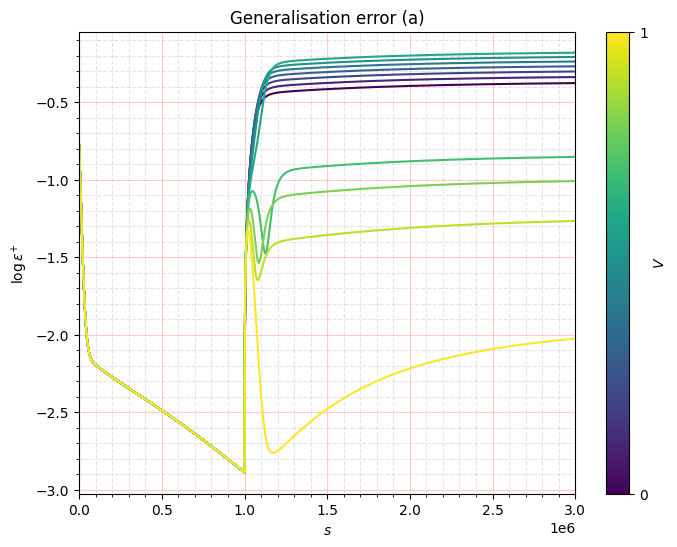

In [181]:
import matplotlib.colors as mcolors

fig1, ax = plt.subplots(figsize=(8,6))
color_map = cm.get_cmap("viridis")
norm = mcolors.Normalize(vmin=0, vmax=1)

for i, (overlap, err) in enumerate(error_0_.items()):
    ax.plot(10*np.arange(len(err)), err, color=color_map(overlap))
# Grid settings
ax.minorticks_on()
ax.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
ax.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)

color_map = cm.get_cmap("viridis")

# Colorbar

sm = cm.ScalarMappable(cmap=color_map, norm=norm)
cbar = fig1.colorbar(sm, ax=ax, label=r"$V$")
cbar.set_ticks([0, 1])
cbar.ax.set_yticklabels(["0", "1"])

# Labels
ax.set_xlabel(r"$s$")
ax.set_ylabel(r"$\log \epsilon^{+}$")

# Style adjustments
ax.set_xlim(0, 3e6)  # Adjust range based on the image
# ax.set_ylim(-5, 0)  # Logarithmic scaling

plt.title("Generalisation error (a)")
fig1.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_15384\69427103.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("plasma")
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\69427103.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


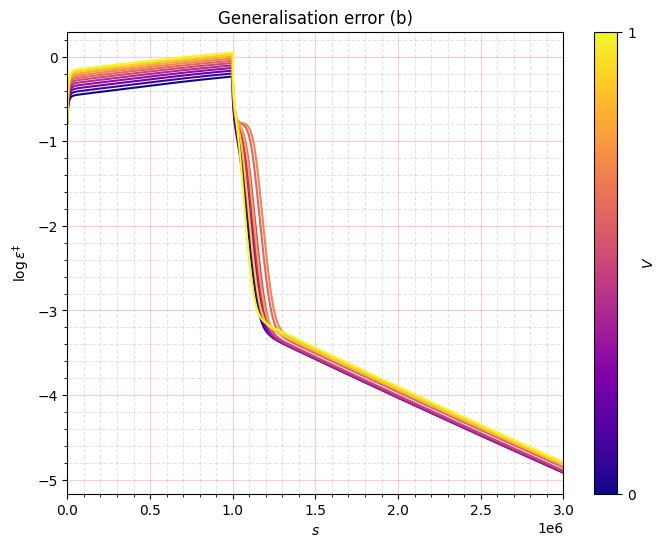

In [182]:
color_map = cm.get_cmap("plasma")
norm = mcolors.Normalize(vmin=0, vmax=1)

fig2, ax = plt.subplots(figsize=(8, 6))

for i, (overlap, err) in enumerate(error_1_.items()):
    plt.plot(10*np.arange(len(err)), err,  color=color_map(overlap))
# Grid settings
ax.minorticks_on()
ax.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
ax.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
# Labels
ax.set_xlabel(r"$s$")
ax.set_ylabel(r"$\log \epsilon^{\ddagger}$")

# Colorbar
sm = cm.ScalarMappable(cmap=color_map, norm=norm)
cbar = fig2.colorbar(sm, ax=ax, label=r"$V$")
cbar.set_ticks([0, 1])
cbar.ax.set_yticklabels(["0", "1"])

ax.set_xlim(0, 3e6)

plt.title("Generalisation error (b)")
fig2.show()
# fig.savefig("long_time_transfer.pdf", dpi=100)

## Aggregate  Forgetting

In [106]:
def plot_cross_section(all_ode_errors, all_network_errors, cross_frequency, switch_index, ylim, N, color_map, axis_labels):
    forgettings = []
    net_forgettings = []
    fig = plt.figure()
    order=0
    for i, (o, errors) in enumerate(all_ode_errors.items()):
        switch_error = errors[switch_index]
        N_error = errors[N]
        forgetting = N_error - switch_error
        forgettings.append((o, forgetting))
    for i in range(len(forgettings) - 1):
        plt.plot([forgettings[i][0], forgettings[i+1][0]], [forgettings[i][1], forgettings[i+1][1]], color=color_map(i/len(all_ode_errors)), linewidth=5, zorder=order)
        order += 1
    for i, (o, errors) in enumerate(all_network_errors.items()):
        if i % cross_frequency == 0:
            switch_error = errors[switch_index]
            N_error = errors[N]
            forgetting = N_error - switch_error
            net_forgettings.append((o, forgetting))
            plt.scatter([o], [forgetting], color=color_map(i/len(all_network_errors)), marker='+', s=300, edgecolors='black', linewidth=2, zorder=order+1)
    plt.minorticks_on()
    plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
    plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
    if not axis_labels:
        plt.tick_params(
                    axis='both',         # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False, # labels along the bottom edge are off
                    left=False,
                    labelleft=False
                ) 
    plt.xlim(0,1)
    if ylim is not None:
        plt.ylim(ylim)
    fig.show()
    if ylim is not None:
        fig.savefig(f"cross_section_{N - switch_index}_crosses_{ylim[0]}_{ylim[1]}.pdf", dpi=100, bbox_inches='tight', pad_inches=0)
    else:
        fig.savefig(f"cross_section_{N - switch_index}_crosses_no.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_15384\1302832545.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plot_cross_section(error_0_,error_0_, 10, 100000, None, 100000+10, cm.get_cmap("viridis"), True)
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\3067994993.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter([o], [forgetting], color=color_map(i/len(all_network_errors)), marker='+', s=300, edgecolors='black', linewidth=2, zorder=order+1)
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\3067994993.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


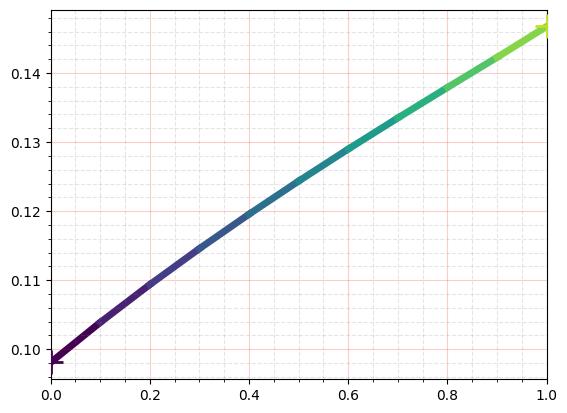

In [118]:
plot_cross_section(error_0_,error_0_, 10, 100000, None, 100000+10, cm.get_cmap("viridis"), True)

C:\Users\USER\AppData\Local\Temp\ipykernel_15384\3121672713.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plot_cross_section(error_0_,error_0_, 10, 100000, None, 100000+100, cm.get_cmap("viridis"), True)
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\3067994993.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter([o], [forgetting], color=color_map(i/len(all_network_errors)), marker='+', s=300, edgecolors='black', linewidth=2, zorder=order+1)
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\3067994993.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


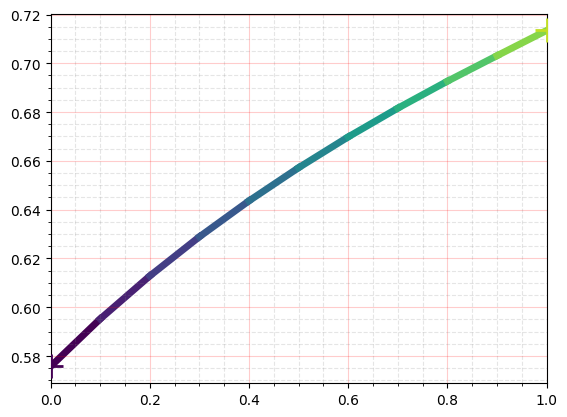

In [98]:
plot_cross_section(error_0_,error_0_, 10, 100000, None, 100000+100, cm.get_cmap("viridis"), True)

C:\Users\USER\AppData\Local\Temp\ipykernel_15384\2076085008.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plot_cross_section(error_0_,error_0_, 10, 100000, None, 100000+1000, cm.get_cmap("viridis"), True)
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\3067994993.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter([o], [forgetting], color=color_map(i/len(all_network_errors)), marker='+', s=300, edgecolors='black', linewidth=2, zorder=order+1)
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\3067994993.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


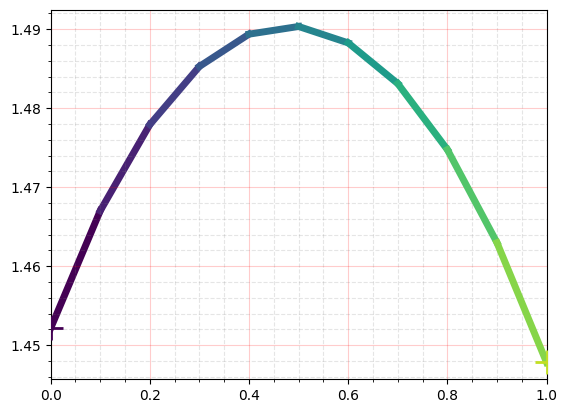

In [121]:
plot_cross_section(error_0_,error_0_, 10, 100000, None, 100000+1000, cm.get_cmap("viridis"), True)

C:\Users\USER\AppData\Local\Temp\ipykernel_15384\1097454344.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plot_cross_section(error_0_,error_0_, 10, 100000, None, 100000+10000, cm.get_cmap("viridis"), True)
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\3067994993.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter([o], [forgetting], color=color_map(i/len(all_network_errors)), marker='+', s=300, edgecolors='black', linewidth=2, zorder=order+1)
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\3067994993.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


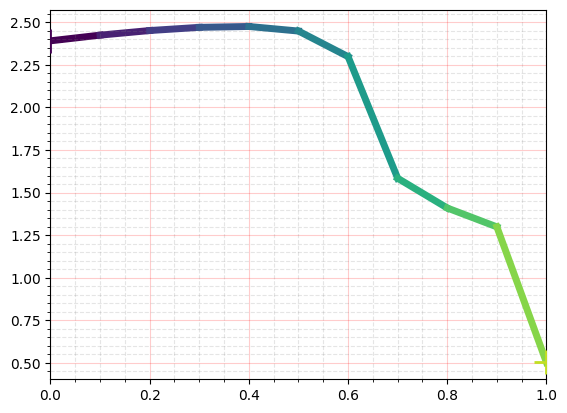

In [99]:
plot_cross_section(error_0_,error_0_, 10, 100000, None, 100000+10000, cm.get_cmap("viridis"), True)

C:\Users\USER\AppData\Local\Temp\ipykernel_15384\908886305.py:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\908886305.py:41: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\908886305.py:75: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig3.show()


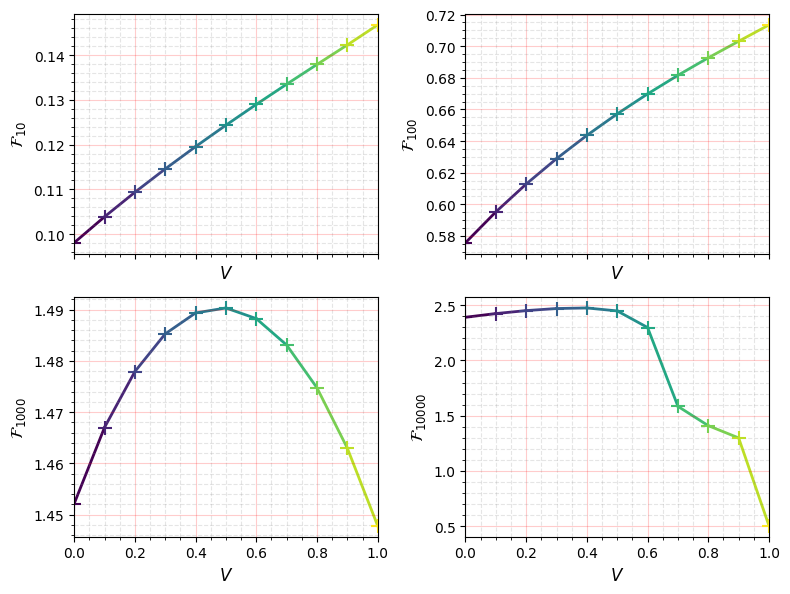

In [157]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def plot_all_forgetting(all_ode_errors, all_network_errors, cross_frequency, switch_index, ylim_values, color_map, axis_labels):
    fig3, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=False)

    # Define colormap normalization
    norm = mcolors.Normalize(vmin=0, vmax=len(all_ode_errors)-1)

    N_values = [10, 100, 1000, 10000]  # Corresponding subplot labels
    for ax, N in zip(axes.flatten(), N_values):
        forgettings = []
        net_forgettings = []

        # Compute forgetting curves
        for i, (o, errors) in enumerate(all_ode_errors.items()):
            switch_error = errors[switch_index]
            N_error = errors[switch_index+N]
            forgetting = N_error - switch_error
            forgettings.append((o, forgetting))

        # Plot forgetting curves
        for i in range(len(forgettings) - 1):
            ax.plot(
                [forgettings[i][0], forgettings[i + 1][0]],
                [forgettings[i][1], forgettings[i + 1][1]],
                color=color_map(norm(i)),
                linewidth=2,
                zorder=1
            )

        # Scatter points for network errors
        for i, (o, errors) in enumerate(all_network_errors.items()):
            if i % cross_frequency == 0:
                switch_error = errors[switch_index]
                N_error = errors[switch_index+N]
                forgetting = N_error - switch_error
                net_forgettings.append((o, forgetting))
                ax.scatter(
                    [o], [forgetting], 
                    color=color_map(norm(i)), 
                    marker='+', s=100, edgecolors='black', linewidth=1.5, zorder=2
                )

        # Grid settings
        ax.minorticks_on()
        ax.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
        ax.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)

        # Axis labels
        if not axis_labels:
            ax.tick_params(
                axis='both', which='both',
                bottom=False, top=False, left=False,
                labelbottom=False, labelleft=False
            )

        # Set limits
        ax.set_xlim(0, 1)
   

        # Set label
        ax.set_xlabel(r"$V$", fontsize=12)
        ax.set_ylabel(r"$\mathcal{F}_{" + str(N) + r"}$", fontsize=12)


    # Adjust layout
    plt.tight_layout()
    
    # Save figure
    plt.savefig("cross_section_plots.pdf", dpi=300, bbox_inches='tight', pad_inches=0)
    # plt.show()
    fig3.show()
    return fig3

# Example Usage
color_map = cm.get_cmap("viridis")

fig3 = plot_all_forgetting(
    error_0_, error_0_, cross_frequency=1, switch_index=100000,
    ylim_values=None, color_map=color_map, axis_labels=True
)


## Aggregate Transfer

In [ ]:
def plot_cross_section_transfer(all_ode_errors, all_network_errors, cross_frequency, switch_index, ylim, N, color_map, axis_labels):
    transfers = []
    net_transfers = []
    fig = plt.figure()
    order=0
    for i, (o, errors) in enumerate(all_ode_errors.items()):
        switch_error = errors[switch_index]
        N_error = errors[N]
        transfer = switch_error - N_error
        transfers.append((o, transfer))
    for i in range(len(transfers) - 1):
        plt.plot([transfers[i][0], transfers[i+1][0]], [transfers[i][1], transfers[i+1][1]], color=color_map(i/len(all_ode_errors)), linewidth=5, zorder=order)
        order += 1
    for i, (o, errors) in enumerate(all_network_errors.items()):
        if i % cross_frequency == 0:
            switch_error = errors[switch_index]
            N_error = errors[N]
            transfer = switch_error - N_error
            net_transfers.append((o, transfer))
            plt.scatter([o], [transfer], color=color_map(i/len(all_network_errors)), marker='+', s=300, edgecolors='black', linewidth=2, zorder=order+1)
    plt.minorticks_on()
    plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
    plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)   
    if not axis_labels:
        plt.tick_params(
                    axis='both',         # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False, # labels along the bottom edge are off
                    left=False,
                    labelleft=False
                ) 
    plt.xlim(0,1)
    if ylim is not None:
        plt.ylim(ylim)
    fig.show()
    if ylim is not None:
        fig.savefig(f"cross_section_transfer_{N - switch_index}_crosses_{ylim[0]}_{ylim[1]}.pdf", dpi=100, bbox_inches='tight', pad_inches=0)
    else:
        fig.savefig(f"cross_section_transfer_{N - switch_index}_crosses_no.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_15384\1621633994.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plot_cross_section_transfer(error_1_,error_1_, 10, 100000, None,100000+10, cm.get_cmap("plasma"), True)
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\3151003323.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter([o], [transfer], color=color_map(i/len(all_network_errors)), marker='+', s=300, edgecolors='black', linewidth=2, zorder=order+1)
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\3151003323.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig4.show()


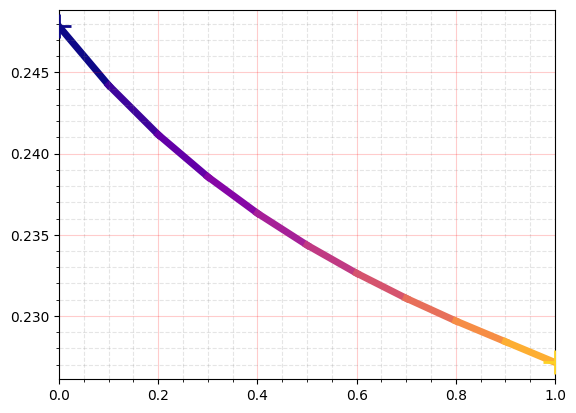

In [155]:
plot_cross_section_transfer(error_1_,error_1_, 10, 100000, None,100000+10, cm.get_cmap("plasma"), True)

C:\Users\USER\AppData\Local\Temp\ipykernel_15384\3072199567.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plot_cross_section_transfer(error_1_,error_1_, 10, 100000, None,100000+100, cm.get_cmap("plasma"), True)
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\3031478472.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter([o], [transfer], color=color_map(i/len(all_network_errors)), marker='+', s=300, edgecolors='black', linewidth=2, zorder=order+1)
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\3031478472.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


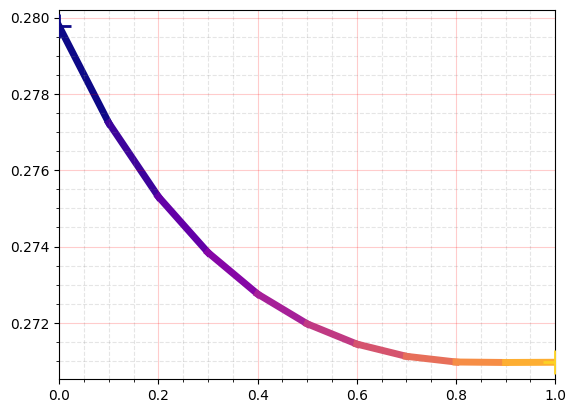

In [88]:
plot_cross_section_transfer(error_1_,error_1_, 10, 100000, None,100000+100, cm.get_cmap("plasma"), True)

C:\Users\USER\AppData\Local\Temp\ipykernel_15384\2971849324.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plot_cross_section_transfer(error_1_,error_1_, 10, 100000, None,100000+1000, cm.get_cmap("plasma"), True)
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\3031478472.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter([o], [transfer], color=color_map(i/len(all_network_errors)), marker='+', s=300, edgecolors='black', linewidth=2, zorder=order+1)
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\3031478472.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


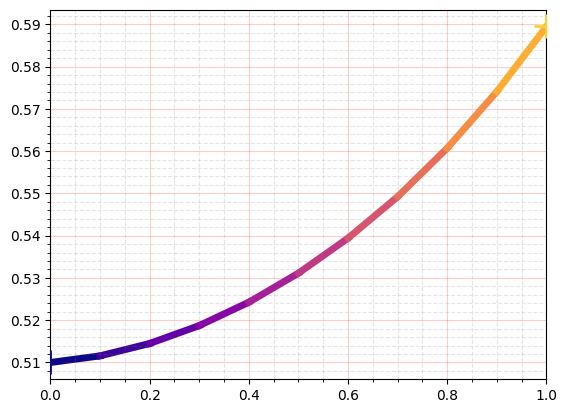

In [89]:
plot_cross_section_transfer(error_1_,error_1_, 10, 100000, None,100000+1000, cm.get_cmap("plasma"), True)

C:\Users\USER\AppData\Local\Temp\ipykernel_15384\4037377603.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plot_cross_section_transfer(error_1_,error_1_, 10, 100000, None,100000+10000, cm.get_cmap("plasma"), True)
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\3031478472.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter([o], [transfer], color=color_map(i/len(all_network_errors)), marker='+', s=300, edgecolors='black', linewidth=2, zorder=order+1)
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\3031478472.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


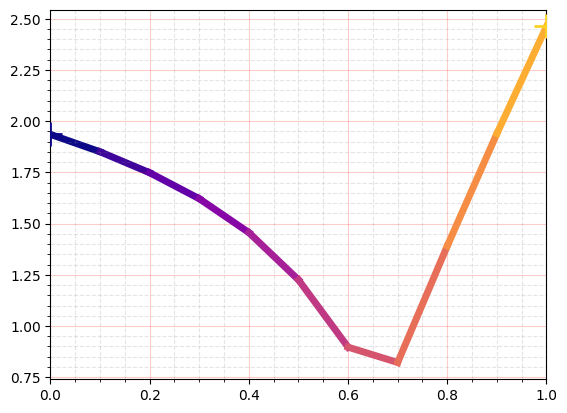

In [91]:

plot_cross_section_transfer(error_1_,error_1_, 10, 100000, None,100000+10000, cm.get_cmap("plasma"), True)

C:\Users\USER\AppData\Local\Temp\ipykernel_15384\1416374444.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("plasma")
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\1416374444.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


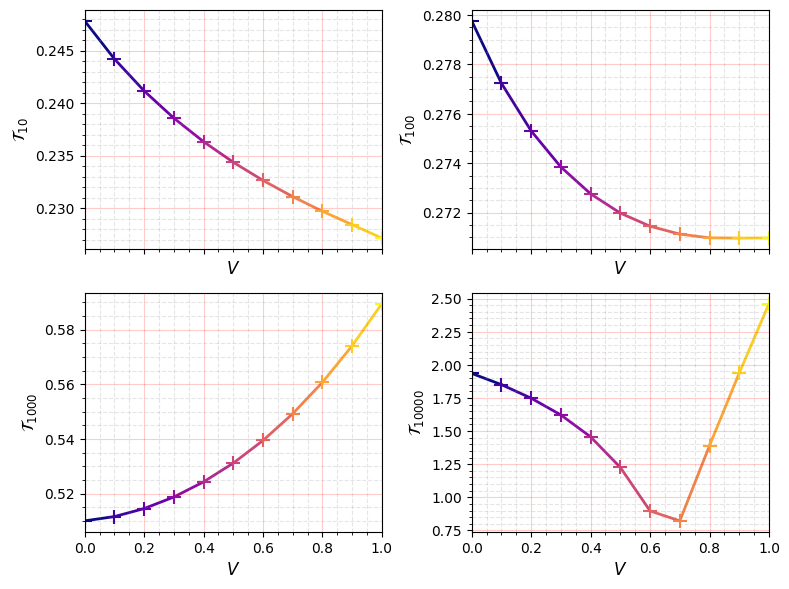

In [158]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def plot_cross_section_transfer(all_ode_errors, all_network_errors, cross_frequency, switch_index, ylim_values, color_map, axis_labels):
    fig4, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=False)

    # Define colormap normalization
    norm = mcolors.Normalize(vmin=0, vmax=len(all_ode_errors)-1)

    N_values = [10, 100, 1000, 10000]  # Labels for y-axis
    for ax, N in zip(axes.flatten(), N_values):
        transfers = []
        net_transfers = []

        # Compute transfer values
        for i, (o, errors) in enumerate(all_ode_errors.items()):
            switch_error = errors[switch_index]
            N_error = errors[switch_index+N]
            transfer = switch_error - N_error
            
            transfers.append((o, transfer))

        # Plot transfer curves
        for i in range(len(transfers) - 1):
            ax.plot(
                [transfers[i][0], transfers[i + 1][0]],
                [transfers[i][1], transfers[i + 1][1]],
                color=color_map(norm(i)),
                linewidth=2,
                zorder=1
            )

        # Scatter points for network transfers
        for i, (o, errors) in enumerate(all_network_errors.items()):
            if i % cross_frequency == 0:
                switch_error = errors[switch_index]
                N_error = errors[switch_index+N]
                transfer = switch_error - N_error
                net_transfers.append((o, transfer))
                ax.scatter(
                    [o], [transfer], 
                    color=color_map(norm(i)), 
                    marker='+', s=100, edgecolors='black', linewidth=1.5, zorder=2
                )

        # Grid settings
        ax.minorticks_on()
        ax.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
        ax.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)

        # Axis labels
        if not axis_labels:
            ax.tick_params(
                axis='both', which='both',
                bottom=False, top=False, left=False,
                labelbottom=False, labelleft=False
            )

        # Set limits
        ax.set_xlim(0, 1)
  
        ax.set_xlabel( r"$V$", ha='center', fontsize=12)
        ax.set_ylabel(r"$\mathcal{T}_{" + str(N) + r"}$", fontsize=12)
        
    # Adjust layout
    plt.tight_layout()
    
    # Save figure
    plt.savefig("cross_section_transfer_plots.pdf", dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()
    return fig4

# Example Usage
color_map = cm.get_cmap("plasma")


fig4 = plot_cross_section_transfer(
    error_1_, error_1_, cross_frequency=1, switch_index=100000,
    ylim_values=None, color_map=color_map, axis_labels=True
)


## Combined figure 

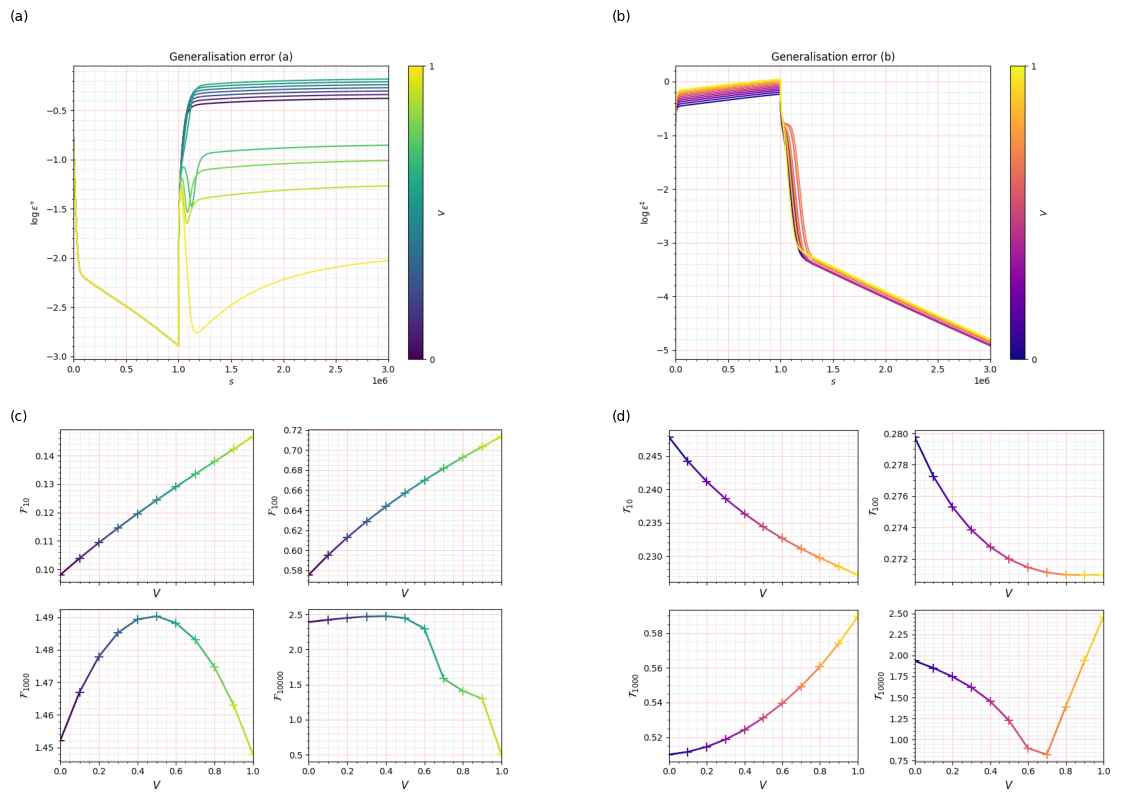

Figures saved in Figure3.pdf


In [183]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Create a 2x2 figure layout
fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

# Order of figures (matching the reference image)
figures = [fig1, fig2, fig3, fig4]
labels = ["(a)", "(b)", "(c)", "(d)"]  # Labels for each subplot

# Loop through and place each subplot correctly
for ax, subfig, label in zip(axes.flatten(), figures, labels):
    subfig.canvas.draw()  # Ensure it is drawn before using
    ax.imshow(subfig.canvas.buffer_rgba())  # Convert figure to image
    ax.axis('off')  # Remove axes
    ax.text(0, 1.0, label, transform=ax.transAxes, fontsize=10)

# Show the final combined figure
plt.show()

# Save the combined figure as a PDF
pdf_filename = "Figure3.pdf"
with PdfPages(pdf_filename) as pdf:
    pdf.savefig(fig, dpi=300, bbox_inches='tight')
    print(f"Figures saved in {pdf_filename}")


In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

output_file = "Figure3.pdf"

# Create a multi-page PDF
with PdfPages(output_file) as pdf:
        pdf.savefig(fig1)
        pdf.savefig(fig2)
        pdf.savefig(fig3)
        pdf.savefig(fig4)
        pdf.savefig(fig5)
        # plt.close(fig)  # Close the figure to free memory

print(f"All figures saved in {output_file}")

## Rotation Magnitude 

C:\Users\USER\AppData\Local\Temp\ipykernel_14488\1654749167.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


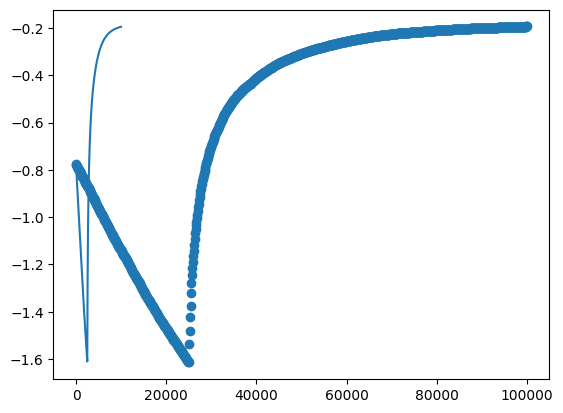

In [36]:

result_folder_path = "../../cata/run/results/rotation_magnitude/"
fig = plt.figure()
ode_df = pd.read_csv(os.path.join(result_folder_path, "1", "single", "data_logger_ode.csv"))
network_df = pd.read_csv(os.path.join(result_folder_path, "1", "single", "data_logger_network.csv"))
ode_0 = np.array(ode_df.log_generalisation_error_0)
ode_1 = np.array(ode_df.log_generalisation_error_1)
network_0 = np.array(network_df.log_generalisation_error_0)
network_1 = np.array(network_df.log_generalisation_error_1)
plt.plot(range(len(ode_0)), ode_0)
plt.scatter(range(len(network_0)), network_0)
fig.show()

In [4]:
results_folder = "../../cata/run/results/rotation_magnitude/"

In [29]:
forgets = {}
transfers = {}

error_0 = {}
error_1 = {}

swich_step = 2500

for i,m in enumerate([1,1.57,2.5,3.14159]):
    i = i / 100
    i_df = pd.read_csv(os.path.join(results_folder, f"{m}", "single/data_logger_ode.csv"))
    switch_error_0 = np.array(i_df["log_generalisation_error_0"])[swich_step]
    switch_error_1 = np.array(i_df["log_generalisation_error_1"])[swich_step]
    final_error_0 = np.array(i_df["log_generalisation_error_0"])[-1]
    final_error_1 = np.array(i_df["log_generalisation_error_1"])[-1]
    final_forgetting = final_error_0 - switch_error_0
    final_transfer = switch_error_1 - final_error_1
    forgets[i] = final_forgetting
    transfers[i] = final_transfer
    error_0[i] = np.array(i_df["log_generalisation_error_0"])
    error_1[i] = np.array(i_df["log_generalisation_error_1"])
    
error_0_ = {}
error_1_ = {}
    
for i,m in enumerate([1,1.57,2.5,3.14159]):
    i = i / 100
    i_df = pd.read_csv(os.path.join(results_folder, f"{m}", "single/data_logger_network.csv"))
    switch_error_0 = np.array(i_df["log_generalisation_error_0"])[swich_step]
    switch_error_1 = np.array(i_df["log_generalisation_error_1"])[swich_step]
    final_error_0 = np.array(i_df["log_generalisation_error_0"])[-1]
    final_error_1 = np.array(i_df["log_generalisation_error_1"])[-1]
    final_forgetting = final_error_0 - switch_error_0
    final_transfer = switch_error_1 - final_error_1
    forgets[i] = final_forgetting
    transfers[i] = final_transfer
    error_0_[i] = np.array(i_df["log_generalisation_error_0"])
    error_1_[i] = np.array(i_df["log_generalisation_error_1"])

C:\Users\USER\AppData\Local\Temp\ipykernel_14488\1666141593.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C:\Users\USER\AppData\Local\Temp\ipykernel_14488\1666141593.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


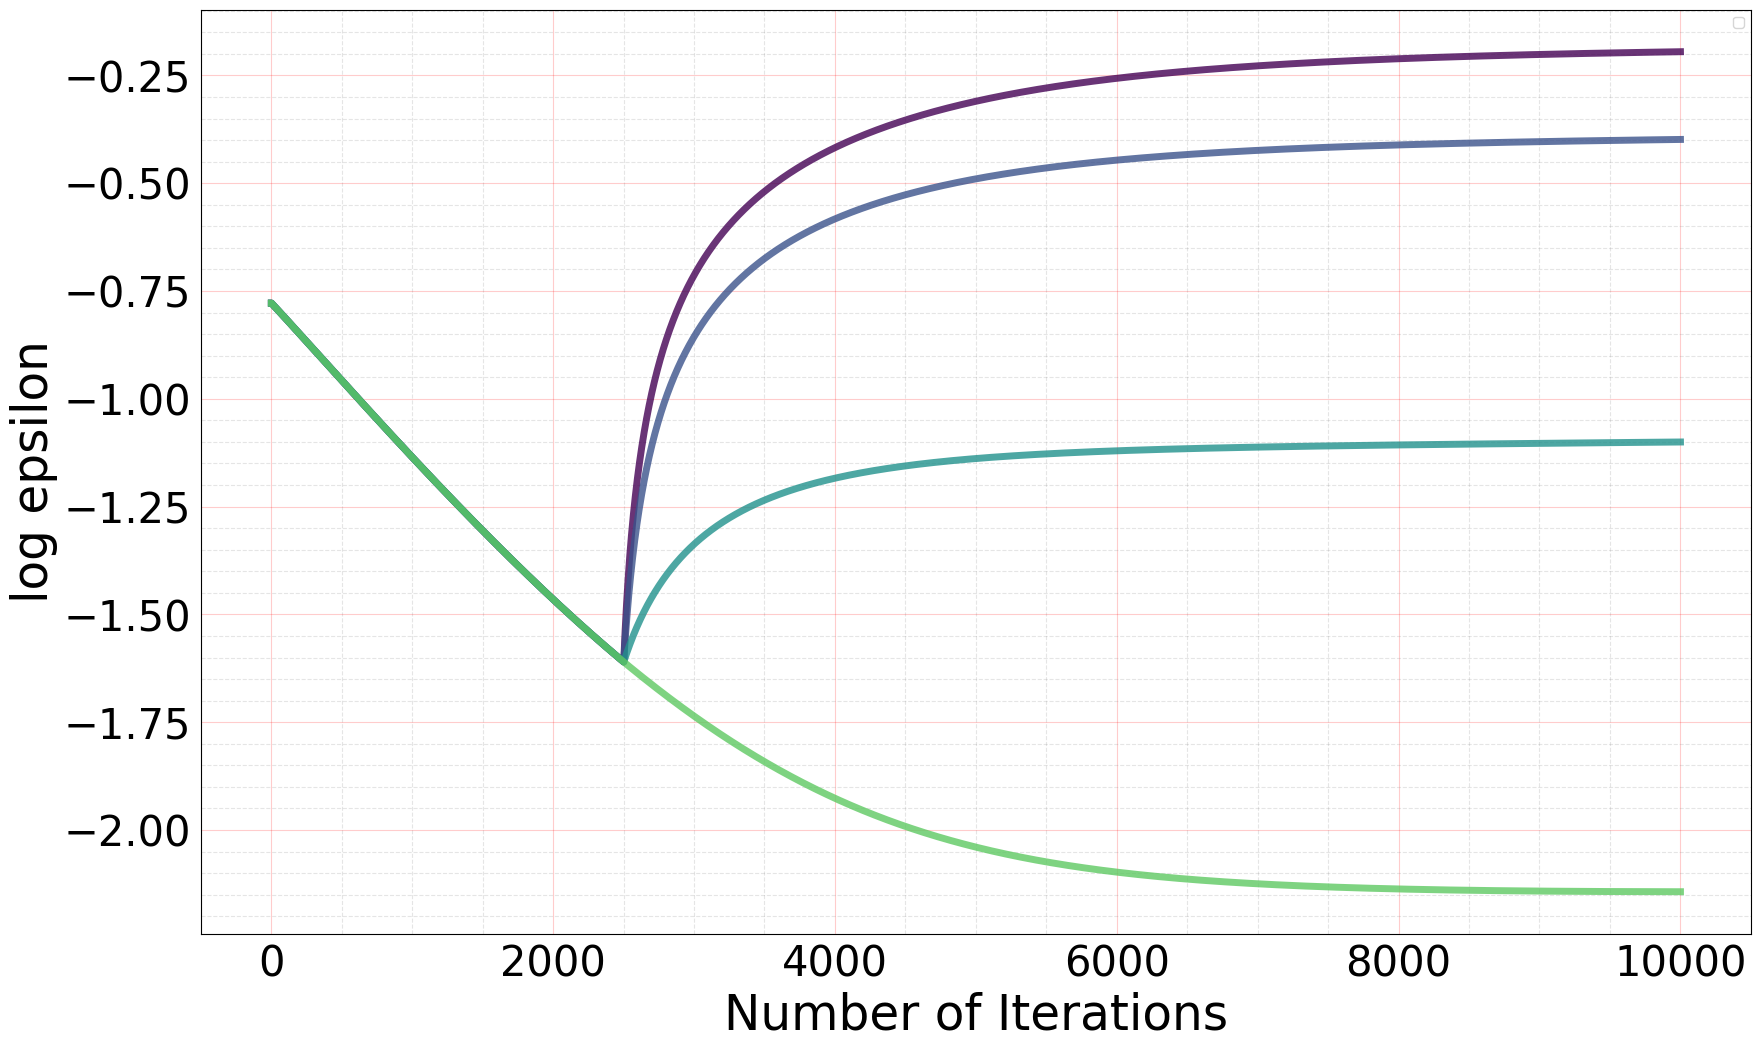

In [53]:
color_map = cm.get_cmap("viridis")

N = 30000
M = 100

# switch = 10000
switch = 2500

fig = plt.figure(figsize=(20, 12))

# plt.plot(np.arange(len(error_0[0.0][:switch])), error_0[0.0][:switch], color='k', alpha=0.4, linewidth=3)
for i, (overlap, err) in enumerate(error_0.items()):
#     if i in [20]:
    plt.plot(np.arange(len(err[:N])), err[:N], color=color_map(i/len(error_0)), alpha=0.8, linewidth=5)
    
# for i, (overlap, err) in enumerate(error_0_.items()):
#     if i in [1, 100]:
#         plt.scatter(np.arange(switch, len(err[:N]))[0::M], err[switch:N][0::M], color=color_map(i/len(error_0_)), s=100, marker="+")

plt.legend()
# plt.xlim(0, N)
# plt.ylim(-4.5, -0.5)
plt.minorticks_on()
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=True, # labels along the bottom edge are off
            left=False,
            labelleft=True,
            labelsize = 30
    
        ) 
plt.xlabel("Number of Iterations", fontsize=35)
plt.ylabel("log epsilon", fontsize=35)
fig.show()
# fig.savefig("long_time_forgetting_no_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_14488\1787860890.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("plasma")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C:\Users\USER\AppData\Local\Temp\ipykernel_14488\1787860890.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


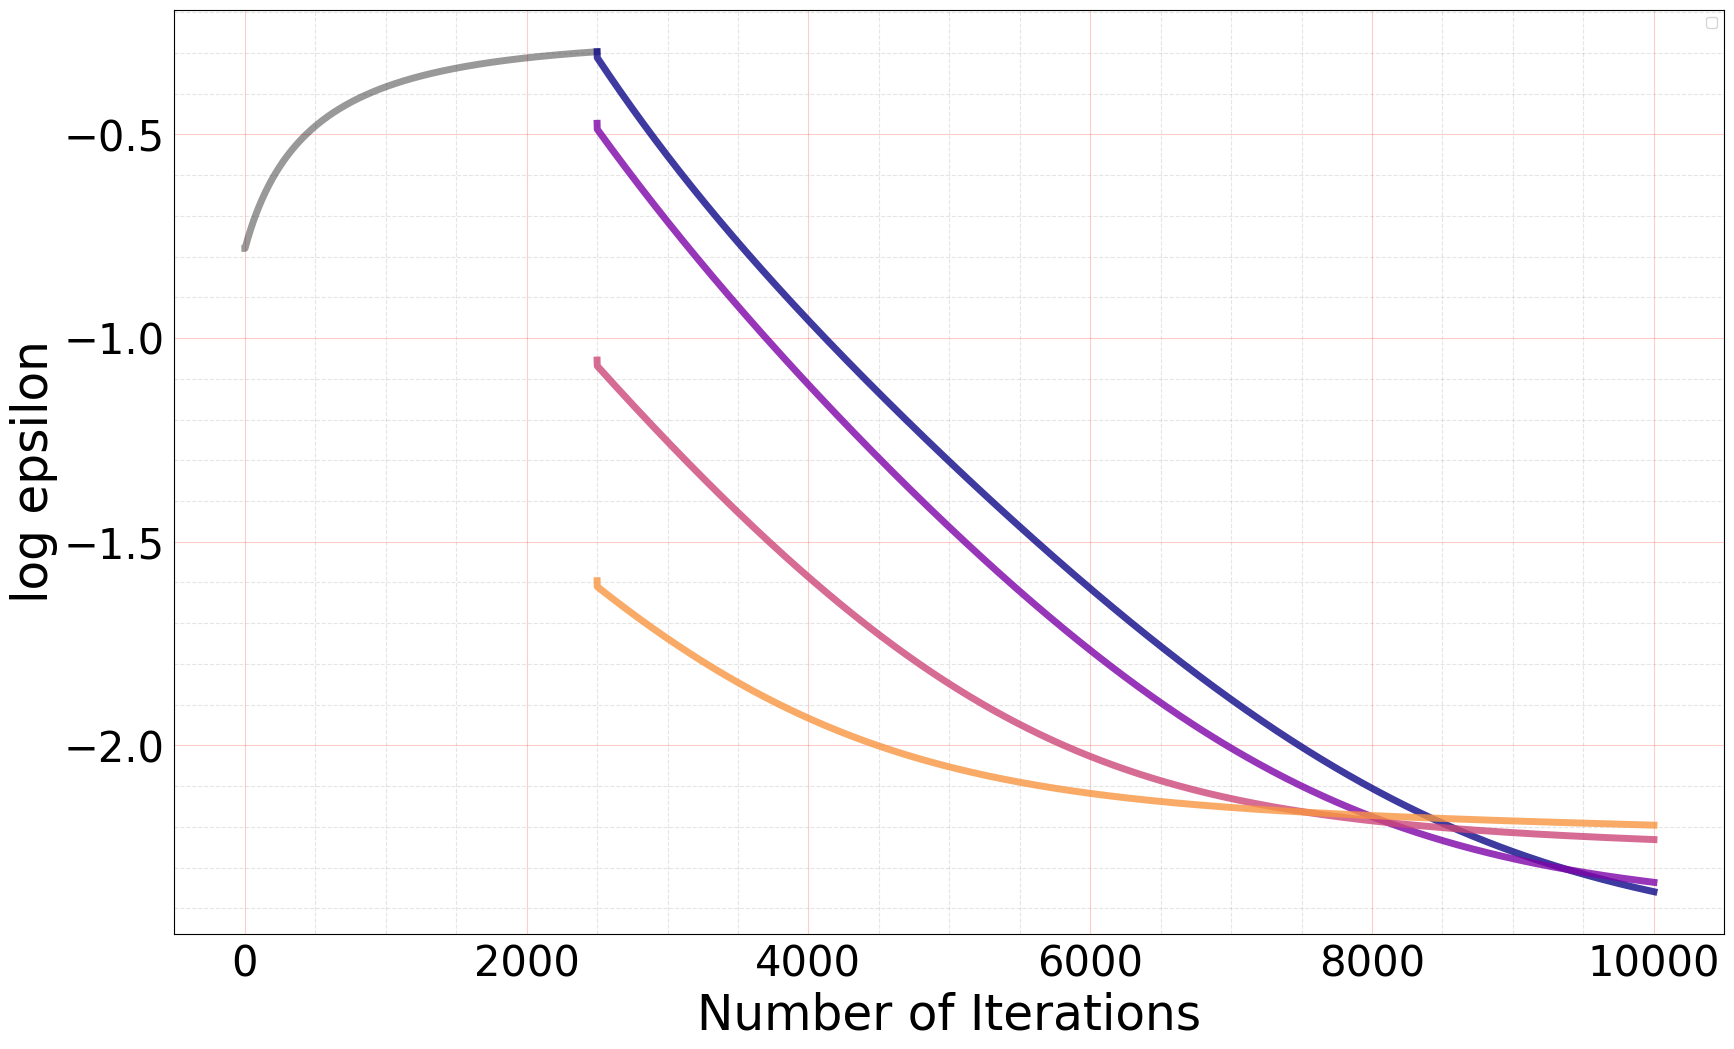

In [44]:
color_map = cm.get_cmap("plasma")

N = 30000
M = 100
# switch = 10000
switch = 2500
factor = 1

fig = plt.figure(figsize=(20, 12))

plt.plot(np.arange(len(error_1[0.0][:switch])), error_1[0.0][:switch], color='k', alpha=0.4, linewidth=5)
for i, (overlap, err) in enumerate(error_1.items()):
#     if i in [0, 1]:
    plt.plot(np.arange(switch, len(err[:N])), err[switch:N], color=color_map(i/len(error_1)), alpha=0.8, linewidth=5)
    
# for i, (overlap, err) in enumerate(error_1.items()):
#     if i in [0, 1]:
#         plt.scatter(np.arange(switch//factor, len(error_1_[overlap][:N//factor]))[0::M], error_1_[overlap][switch//factor:N//factor][0::M], color=color_map(i/len(error_1_)), s=100, marker="+")

plt.legend()
plt.minorticks_on()
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=True, # labels along the bottom edge are off
            left=False,
            labelleft=True,
            labelsize = 30
    
        ) 
plt.xlabel("Number of Iterations", fontsize=35)
plt.ylabel("log epsilon", fontsize=35)
fig.show()
# fig.savefig("long_time_transfer_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

In [50]:
color_map = cm.get_cmap("viridis")

def cross_section_plot(interval):
    forgettings = {}
    fig = plt.figure()
    for i, (overlap, err) in enumerate(error_0.items()):
        switch_error = err[switch]
        interval_error = err[interval]
        forgetting = interval_error - switch_error
        forgettings[overlap] = forgetting
        plt.scatter(overlap, forgetting, color=color_map(i/len(error_0)), s=100)
    for i, (overlap, err) in enumerate(error_0_.items()):
        switch_error = err[switch]
        interval_error = err[interval]
        forgetting = interval_error - switch_error
        forgettings[overlap] = forgetting
        plt.scatter(overlap, forgetting, color=color_map(i/len(error_0)), marker='+')
    plt.minorticks_on()
    plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
    plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
    plt.tick_params(
                axis='both',         # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False, # labels along the bottom edge are off
                left=False,
                labelleft=False
            )
    # plt.xlim(0, 1)
#     plt.ylim(0, 1)
    fig.show()
    # fig.savefig(f"forgetting_cross_section_{interval - switch}_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_14488\4050931660.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")


C:\Users\USER\AppData\Local\Temp\ipykernel_14488\4050931660.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


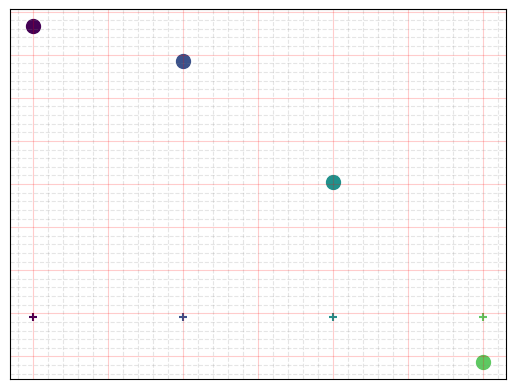

In [51]:
cross_section_plot(10000)

C:\Users\USER\AppData\Local\Temp\ipykernel_14488\3474536122.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


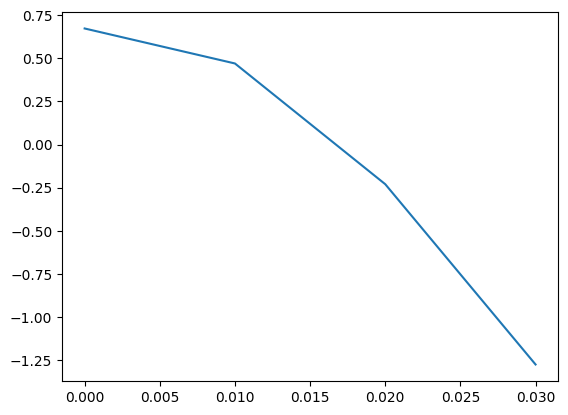

In [47]:
fig = plt.figure()
plt.plot(forgets.keys(), forgets.values())
fig.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14488\1259017235.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


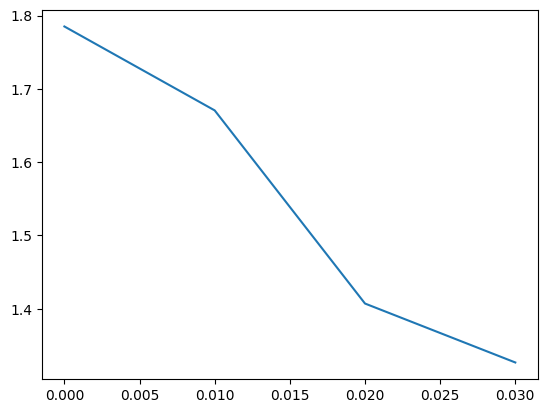

In [48]:
fig = plt.figure()
plt.plot(transfers.keys(), transfers.values())
fig.show()

## Feature copy percentage

In [49]:
# result_folder_path = "../run/results/2020-11-27-18-39-31/"
result_folder_path = "../../cata/run/results/diff_copy_percentage/"

In [3]:
# v_0_dfs = [pd.read_csv(os.path.join(result_folder_path, "v_0.0", str(i), "data_logger_ode.csv")) for i in range(4)]
# v_05_dfs = [pd.read_csv(os.path.join(result_folder_path, "v_0.5", str(i), "data_logger_ode.csv")) for i in range(4)]
# v_1_dfs = [pd.read_csv(os.path.join(result_folder_path, "v_1.0", str(i), "data_logger_ode.csv")) for i in range(4)]
v_0_dfs = pd.read_csv(os.path.join(result_folder_path, "0", "single/data_logger_ode.csv")) 
v_05_dfs =pd.read_csv(os.path.join(result_folder_path, "50", "single/data_logger_ode.csv")) 
v_1_dfs = pd.read_csv(os.path.join(result_folder_path, "100", "single/data_logger_ode.csv"))

In [5]:
# switch_errors_1_v_0 = [df.generalisation_error_1[4999] for df in v_0_dfs]
# switch_errors_1_v_05 = [df.generalisation_error_1[4999] for df in v_05_dfs]
# switch_errors_1_v_1 = [df.generalisation_error_1[4999] for df in v_1_dfs]\

switch_errors_1_v_0 = v_0_dfs.generalisation_error_1[4999] 
switch_errors_1_v_05 = v_05_dfs.generalisation_error_1[4999]
switch_errors_1_v_1 = v_1_dfs.generalisation_error_1[4999] 

In [7]:
len( v_0_dfs.generalisation_error_1)

10002

In [8]:
# final_errors_1_v_0 = [df.generalisation_error_1[14999] for df in v_0_dfs]
# final_errors_1_v_05 = [df.generalisation_error_1[14999] for df in v_05_dfs]
# final_errors_1_v_1 = [df.generalisation_error_1[14999] for df in v_1_dfs]

final_errors_1_v_0 = v_0_dfs.generalisation_error_1[10000]
final_errors_1_v_05 = v_05_dfs.generalisation_error_1[10000]
final_errors_1_v_1 = v_1_dfs.generalisation_error_1[10000] 

In [9]:
np.mean(switch_errors_1_v_0)

0.0609821491556714

In [10]:
np.mean(switch_errors_1_v_05)

0.0609821491556714

In [11]:
np.mean(switch_errors_1_v_1)

0.0609821491556714

In [12]:
switch_errors_1_v_0

0.0609821491556714

In [13]:
switch_errors_1_v_05

0.0609821491556714

In [14]:
np.mean(final_errors_1_v_0)

0.0044775186667361

In [15]:
np.mean(final_errors_1_v_05)

0.0044775186667361

In [16]:
np.mean(final_errors_1_v_1)

0.0044775186667361

In [5]:
result_folder_path = "../run/results/multi_seed_feature_sim_three_points/"

In [6]:
v_0_dfs = [pd.read_csv(os.path.join(result_folder_path, "v_0.0", str(i), "ode_log.csv")) for i in range(4)]
v_05_dfs = [pd.read_csv(os.path.join(result_folder_path, "v_0.5", str(i), "ode_log.csv")) for i in range(4)]
v_1_dfs = [pd.read_csv(os.path.join(result_folder_path, "v_1.0", str(i), "ode_log.csv")) for i in range(4)]

In [9]:
v_0_dfs[0].generalisation_error_0[14999] - v_0_dfs[0].generalisation_error_0[4999]

0.0009497362628354544

In [10]:
v_0_dfs[1].generalisation_error_0[14999] - v_0_dfs[1].generalisation_error_0[4999]

0.005821384159718396

In [15]:
v_0_dfs[2].generalisation_error_0[14999] - v_0_dfs[2].generalisation_error_0[4999]

0.004139326366331297

In [16]:
v_0_dfs[3].generalisation_error_0[14999] - v_0_dfs[3].generalisation_error_0[4999]

0.04403410931718085

In [11]:
v_1_dfs[0].generalisation_error_0[14999] - v_1_dfs[0].generalisation_error_0[4999]

0.0010370710904580305

In [12]:
v_1_dfs[1].generalisation_error_0[14999] - v_1_dfs[1].generalisation_error_0[4999]

0.0026176185810188185

In [13]:
v_1_dfs[2].generalisation_error_0[14999] - v_1_dfs[2].generalisation_error_0[4999]

0.0022384232171990255

In [14]:
v_1_dfs[3].generalisation_error_0[14999] - v_1_dfs[3].generalisation_error_0[4999]

0.003784054451908797

In [17]:
def forgetting_rate(df, switch_step):
    diffs = [df.generalisation_error_0[switch_step + i + 1] - df.generalisation_error_0[switch_step + i] for i in range(100)]
    return np.mean(diffs)

In [19]:
# np.mean([forgetting_rate(v, 4999) for v in v_0_dfs])
forgetting_rate(v_0_dfs, 4999)

0.00010573720671113728

In [20]:
forgetting_rate(v_05_dfs, 4999)

0.00010573720671113728

In [21]:
forgetting_rate(v_1_dfs, 4999)

0.00010573720671113728

In [37]:
forgets = {}
transfers = {}

error_0 = {}
error_1 = {}


for i, i_df in enumerate([v_0_dfs,v_05_dfs,v_1_dfs]):
    # i_df = pd.read_csv(os.path.join(results_folder, f"v_{i}", "0", "ode_log.csv"))
    switch_error_0 = i_df["log_generalisation_error_0"].iloc[2500]
    switch_error_1 = i_df["log_generalisation_error_1"].iloc[2500]
    final_error_0 = i_df["log_generalisation_error_0"].iloc[10000]
    final_error_1 = i_df["log_generalisation_error_1"].iloc[10000]
    final_forgetting = final_error_0 - switch_error_0
    final_transfer = switch_error_1 - final_error_1
    forgets[i] = final_forgetting
    transfers[i] = final_transfer
    error_0[i] = np.array(i_df["log_generalisation_error_0"])
    error_1[i] = np.array(i_df["log_generalisation_error_1"])

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\186379217.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C:\Users\USER\AppData\Local\Temp\ipykernel_14720\186379217.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


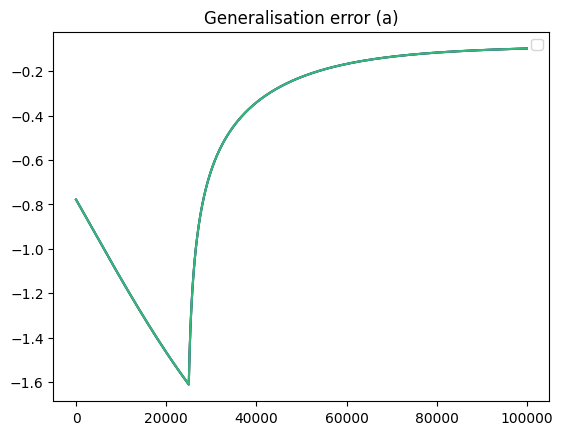

In [38]:
color_map = cm.get_cmap("viridis")

fig = plt.figure()
for i, (overlap, err) in enumerate(error_0.items()):
    plt.plot(10*np.arange(len(err)), err, color=color_map(i/len(error_0)))
plt.legend()
plt.title("Generalisation error (a)")
fig.show()
# fig.savefig("long_time.pdf", dpi=100)

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\2995376421.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("plasma")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C:\Users\USER\AppData\Local\Temp\ipykernel_14720\2995376421.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


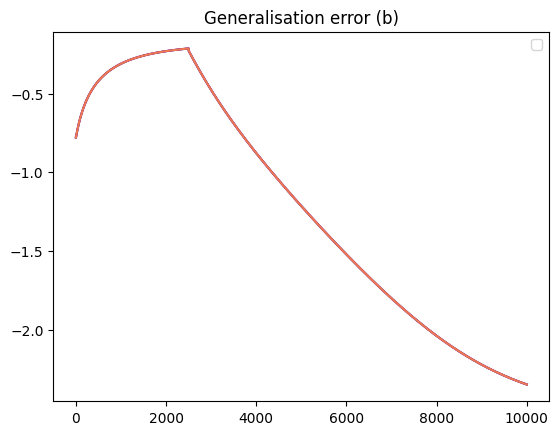

In [39]:
color_map = cm.get_cmap("plasma")

fig = plt.figure()
for i, (overlap, err) in enumerate(error_1.items()):
    plt.plot(range(len(err)), err, color=color_map(i/len(error_1)))
plt.legend()
plt.title("Generalisation error (b)")
fig.show()
# fig.savefig("long_time_transfer.pdf", dpi=100)

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\169748334.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


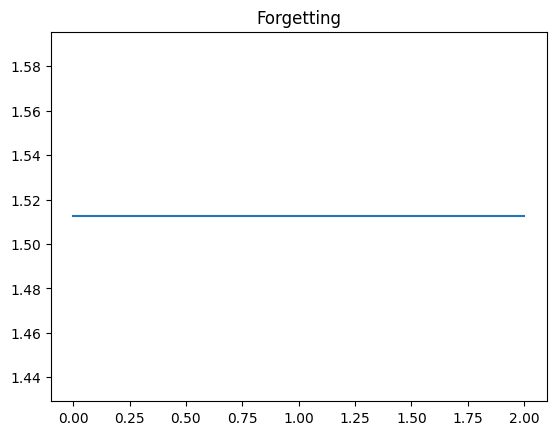

In [43]:
fig = plt.figure()
plt.plot(forgets.keys(), forgets.values())
plt.title("Forgetting")
fig.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_14720\1303424435.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


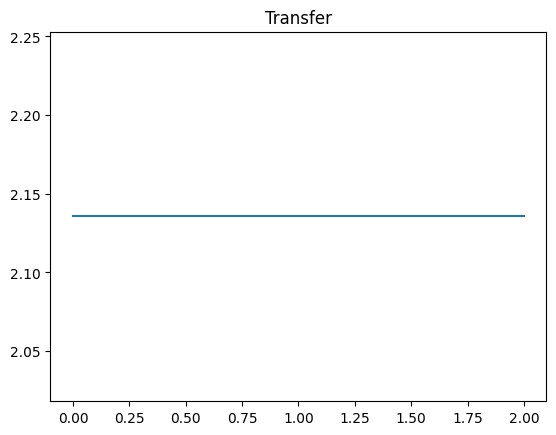

In [42]:
fig = plt.figure()
plt.plot(transfers.keys(), transfers.values())
plt.title("Transfer")
fig.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\3975239718.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\USER\AppData\Local\Temp\ipykernel_14720\3975239718.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


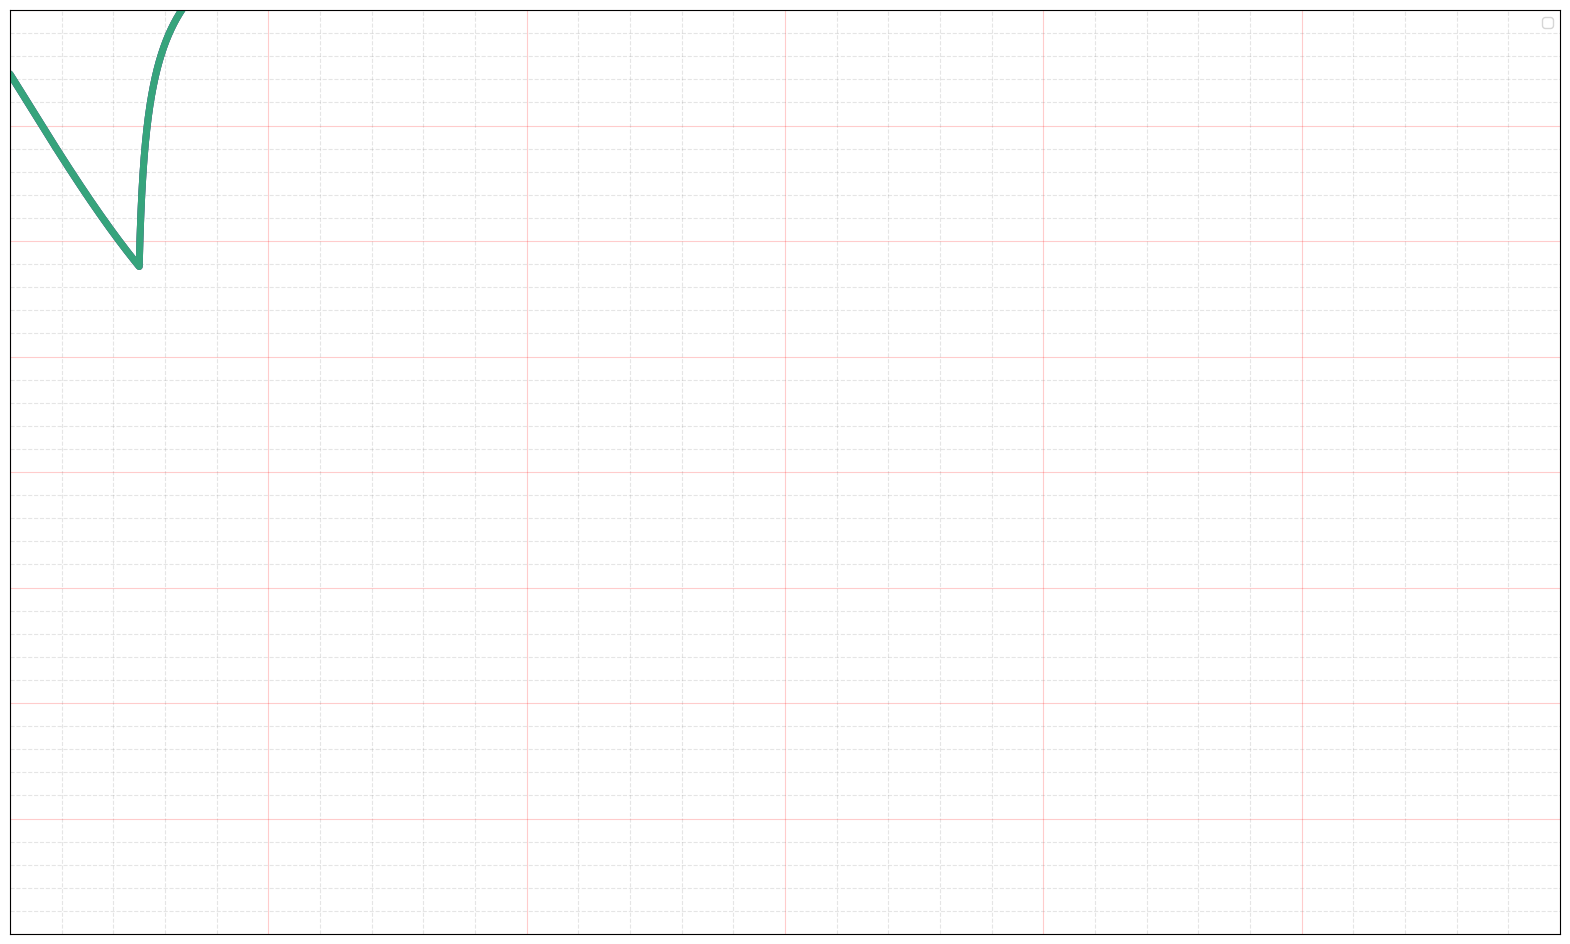

In [46]:
color_map = cm.get_cmap("viridis")

N = 30000
M = 100
switch = 10000

fig = plt.figure(figsize=(20, 12))

# plt.plot(np.arange(len(error_0[0.0][:switch])), error_0[0.0][:switch], color='k', alpha=0.4, linewidth=3)
for i, (overlap, err) in enumerate(error_0.items()):
#     if i in [20]:
    plt.plot(np.arange(len(err[:N])), err[:N], color=color_map(i/len(error_0)), alpha=0.8, linewidth=5)
    
# for i, (overlap, err) in enumerate(error_0_.items()):
#     if i in [1, 100]:
#         plt.scatter(np.arange(switch, len(err[:N]))[0::M], err[switch:N][0::M], color=color_map(i/len(error_0_)), s=100, marker="+")

plt.legend()
plt.xlim(0, N)
plt.ylim(-4.5, -0.5)
plt.minorticks_on()
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
# fig.savefig("long_time_forgetting_no_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\902591799.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("plasma")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C:\Users\USER\AppData\Local\Temp\ipykernel_14720\902591799.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


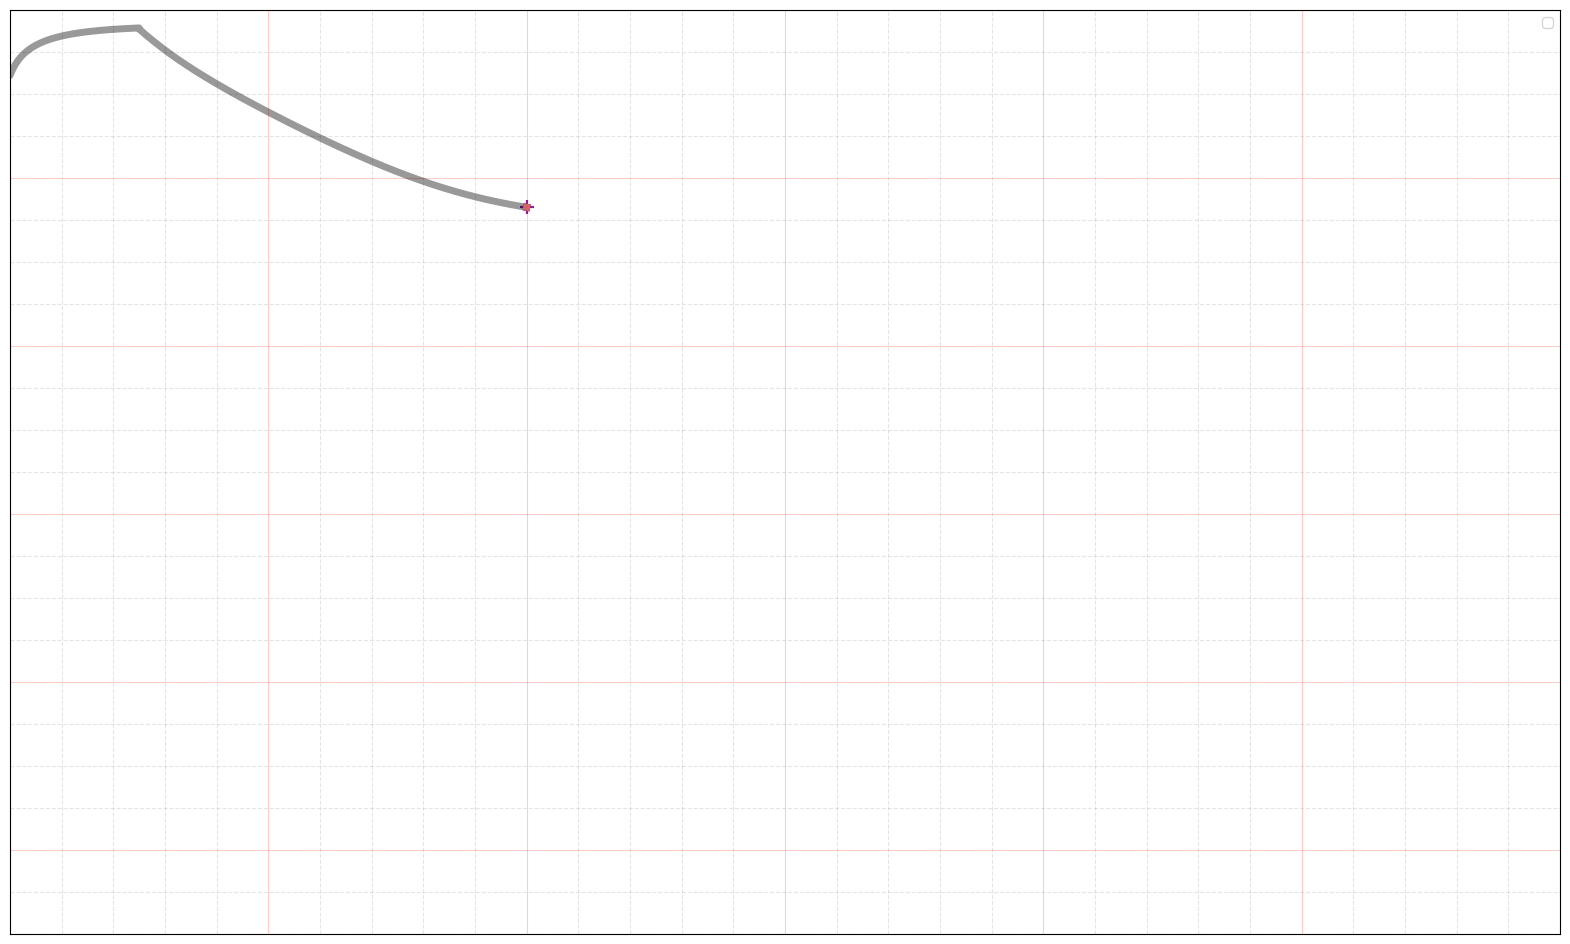

In [48]:
color_map = cm.get_cmap("plasma")

N = 30000
M = 100
switch = 10000
factor = 1

fig = plt.figure(figsize=(20, 12))

plt.plot(np.arange(len(error_1[0.0][:switch])), error_1[0.0][:switch], color='k', alpha=0.4, linewidth=5)
for i, (overlap, err) in enumerate(error_1.items()):
#     if i in [0, 1]:
    plt.plot(np.arange(switch, len(err[:N])), err[switch:N], color=color_map(i/len(error_1)), alpha=0.8, linewidth=5)
    
for i, (overlap, err) in enumerate(error_1.items()):
    if i in [0, 1]:
        plt.scatter(np.arange(switch//factor, len(error_1[overlap][:N//factor]))[0::M], error_1[overlap][switch//factor:N//factor][0::M], color=color_map(i/len(error_1)), s=100, marker="+")

plt.legend()
plt.xlim(0, N)
plt.ylim(-11, 0)
plt.minorticks_on()
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
fig.savefig("long_time_transfer_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

In [49]:
color_map = cm.get_cmap("viridis")

def cross_section_plot(interval):
    forgettings = {}
    fig = plt.figure()
    for i, (overlap, err) in enumerate(error_0.items()):
        switch_error = err[switch]
        interval_error = err[interval]
        forgetting = interval_error - switch_error
        forgettings[overlap] = forgetting
        plt.scatter(overlap, forgetting, color=color_map(i/len(error_0)), s=100)
    for i, (overlap, err) in enumerate(error_0.items()):
        switch_error = err[switch]
        interval_error = err[interval]
        forgetting = interval_error - switch_error
        forgettings[overlap] = forgetting
        plt.scatter(overlap, forgetting, color=color_map(i/len(error_0)), marker='+')
    plt.minorticks_on()
    plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
    plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
    plt.tick_params(
                axis='both',         # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False, # labels along the bottom edge are off
                left=False,
                labelleft=False
            )
    plt.xlim(0, 1)
#     plt.ylim(0, 1)
    fig.show()
    fig.savefig(f"forgetting_cross_section_{interval - switch}_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\1247394447.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")


C:\Users\USER\AppData\Local\Temp\ipykernel_14720\1247394447.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


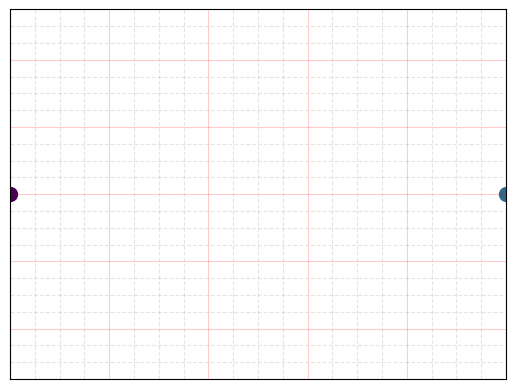

In [56]:
cross_section_plot(10000)

In [59]:
v_0_dfs = pd.read_csv(os.path.join(result_folder_path, "0", "single/data_logger_ode.csv")) 
v_05_dfs =pd.read_csv(os.path.join(result_folder_path, "50", "single/data_logger_ode.csv")) 
v_1_dfs = pd.read_csv(os.path.join(result_folder_path, "100", "single/data_logger_ode.csv"))

n_0_dfs = pd.read_csv(os.path.join(result_folder_path, "0", "single/data_logger_network.csv")) 
n_05_dfs =pd.read_csv(os.path.join(result_folder_path, "50", "single/data_logger_network.csv")) 
n_1_dfs = pd.read_csv(os.path.join(result_folder_path, "100", "single/data_logger_network.csv"))

In [61]:
forgets = {}
transfers = {}

error_0 = {}
error_1 = {}

results_folder = "../../cata/run/results/diff_copy_percentage/"
for i, i_df in enumerate([v_0_dfs,v_05_dfs,v_1_dfs]):
    i = i / 100
    # i_df = pd.read_csv(os.path.join(results_folder, f"v_{i}", "0", "ode_log.csv"))
    switch_error_0 = np.array(i_df["log_generalisation_error_0"])[5000]
    switch_error_1 = np.array(i_df["log_generalisation_error_1"])[5000]
    final_error_0 = np.array(i_df["log_generalisation_error_0"])[-1]
    final_error_1 = np.array(i_df["log_generalisation_error_1"])[-1]
    final_forgetting = final_error_0 - switch_error_0
    final_transfer = switch_error_1 - final_error_1
    forgets[i] = final_forgetting
    transfers[i] = final_transfer
    error_0[i] = np.array(i_df["log_generalisation_error_0"])
    error_1[i] = np.array(i_df["log_generalisation_error_1"])
    
error_0_ = {}
error_1_ = {}
    
for i, i_df in enumerate([n_0_dfs,n_05_dfs,n_1_dfs]):
    i = i / 100
    # i_df = pd.read_csv(os.path.join(results_folder, f"v_{i}", "0", "network_log.csv"))
    switch_error_0 = np.array(i_df["log_generalisation_error_0"])[5000]
    switch_error_1 = np.array(i_df["log_generalisation_error_1"])[5000]
    final_error_0 = np.array(i_df["log_generalisation_error_0"])[-1]
    final_error_1 = np.array(i_df["log_generalisation_error_1"])[-1]
    final_forgetting = final_error_0 - switch_error_0
    final_transfer = switch_error_1 - final_error_1
    forgets[i] = final_forgetting
    transfers[i] = final_transfer
    error_0_[i] = np.array(i_df["log_generalisation_error_0"])
    error_1_[i] = np.array(i_df["log_generalisation_error_1"])

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\1740881277.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


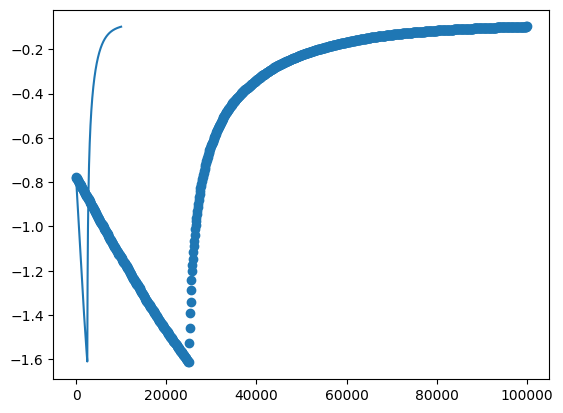

In [62]:

result_folder_path = "../../cata/run/results/diff_copy_percentage/"
fig = plt.figure()
ode_df = pd.read_csv(os.path.join(result_folder_path, "0", "single", "data_logger_ode.csv"))
network_df = pd.read_csv(os.path.join(result_folder_path, "0", "single", "data_logger_network.csv"))
ode_0 = np.array(ode_df.log_generalisation_error_0)
ode_1 = np.array(ode_df.log_generalisation_error_1)
network_0 = np.array(network_df.log_generalisation_error_0)
network_1 = np.array(network_df.log_generalisation_error_1)
plt.plot(range(len(ode_0)), ode_0)
plt.scatter(range(len(network_0)), network_0)
fig.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\2207999917.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


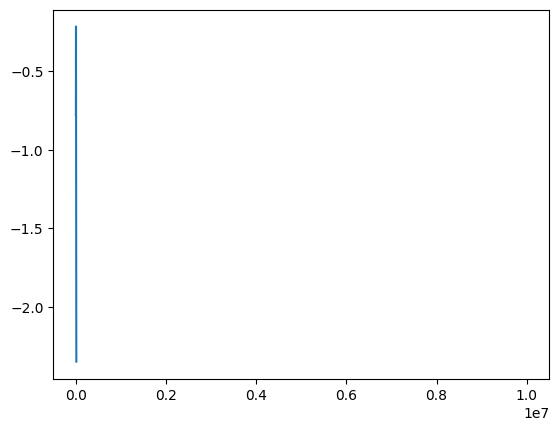

In [58]:
fig = plt.figure()

plt.plot(np.arange(len(ode_df.log_generalisation_error_1)), np.array(ode_df.log_generalisation_error_1))
plt.plot(100 * np.arange(len(network_df.log_generalisation_error_1)), np.array(network_df.log_generalisation_error_1), linestyle="dashed")
fig.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\1735802772.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\USER\AppData\Local\Temp\ipykernel_14720\1735802772.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


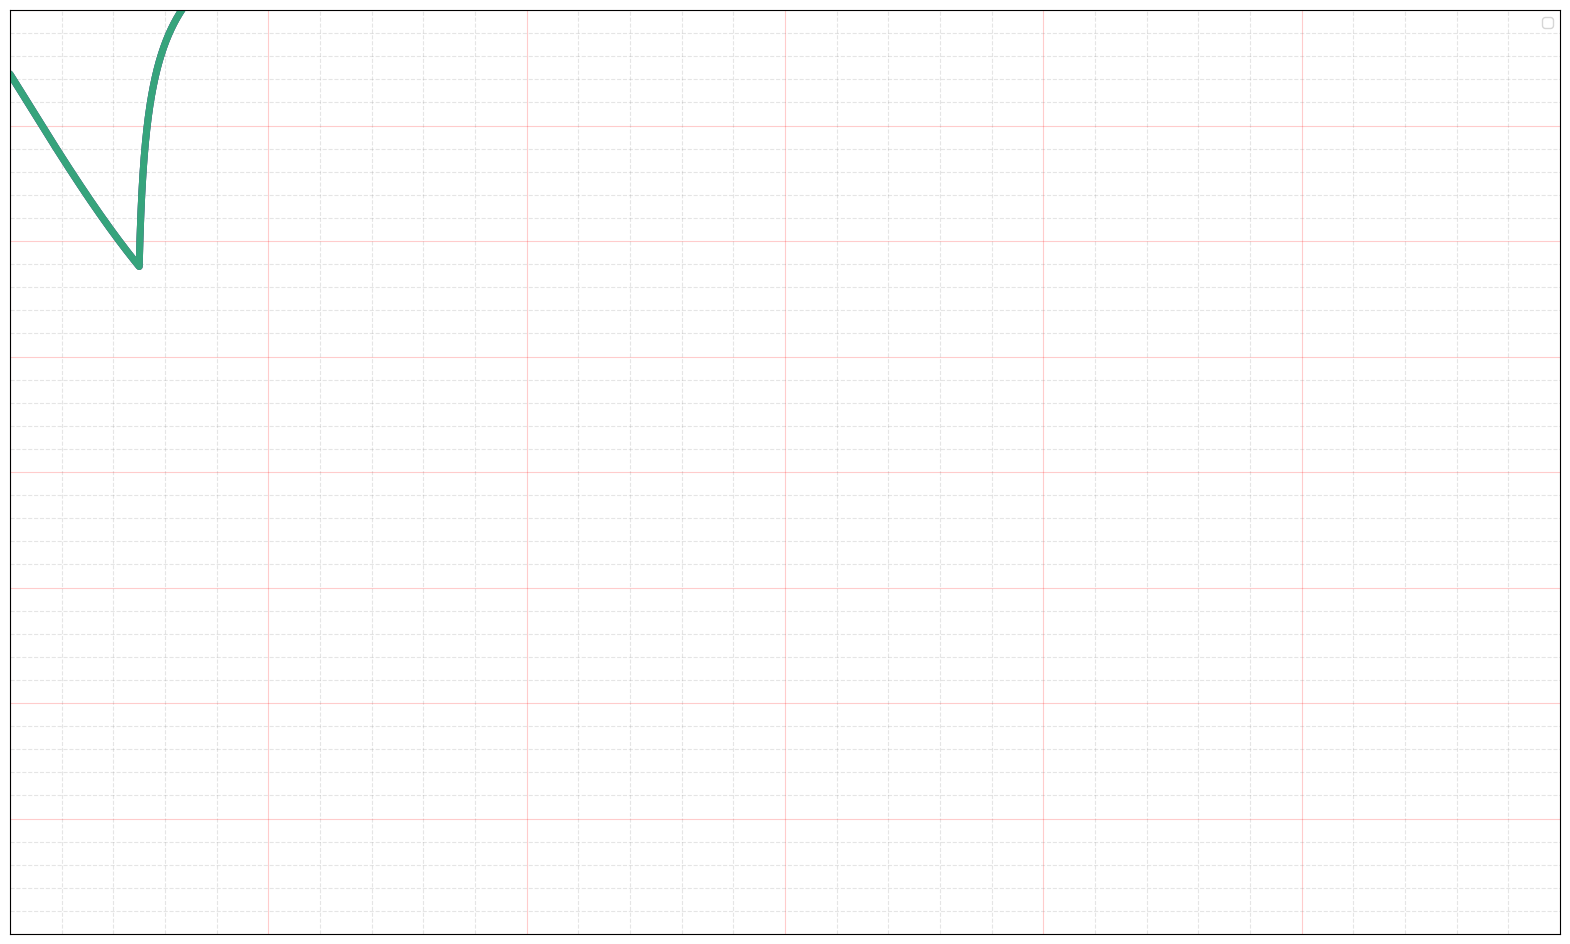

In [64]:
color_map = cm.get_cmap("viridis")

N = 30000
M = 100
switch = 10000

fig = plt.figure(figsize=(20, 12))

# plt.plot(np.arange(len(error_0[0.0][:switch])), error_0[0.0][:switch], color='k', alpha=0.4, linewidth=3)
for i, (overlap, err) in enumerate(error_0.items()):
#     if i in [20]:
    plt.plot(np.arange(len(err[:N])), err[:N], color=color_map(i/len(error_0)), alpha=0.8, linewidth=5)
    
# for i, (overlap, err) in enumerate(error_0_.items()):
#     if i in [1, 100]:
#         plt.scatter(np.arange(switch, len(err[:N]))[0::M], err[switch:N][0::M], color=color_map(i/len(error_0_)), s=100, marker="+")

plt.legend()
plt.xlim(0, N)
plt.ylim(-4.5, -0.5)
plt.minorticks_on()
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
fig.savefig("long_time_forgetting_no_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\346027228.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("plasma")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\USER\AppData\Local\Temp\ipykernel_14720\346027228.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


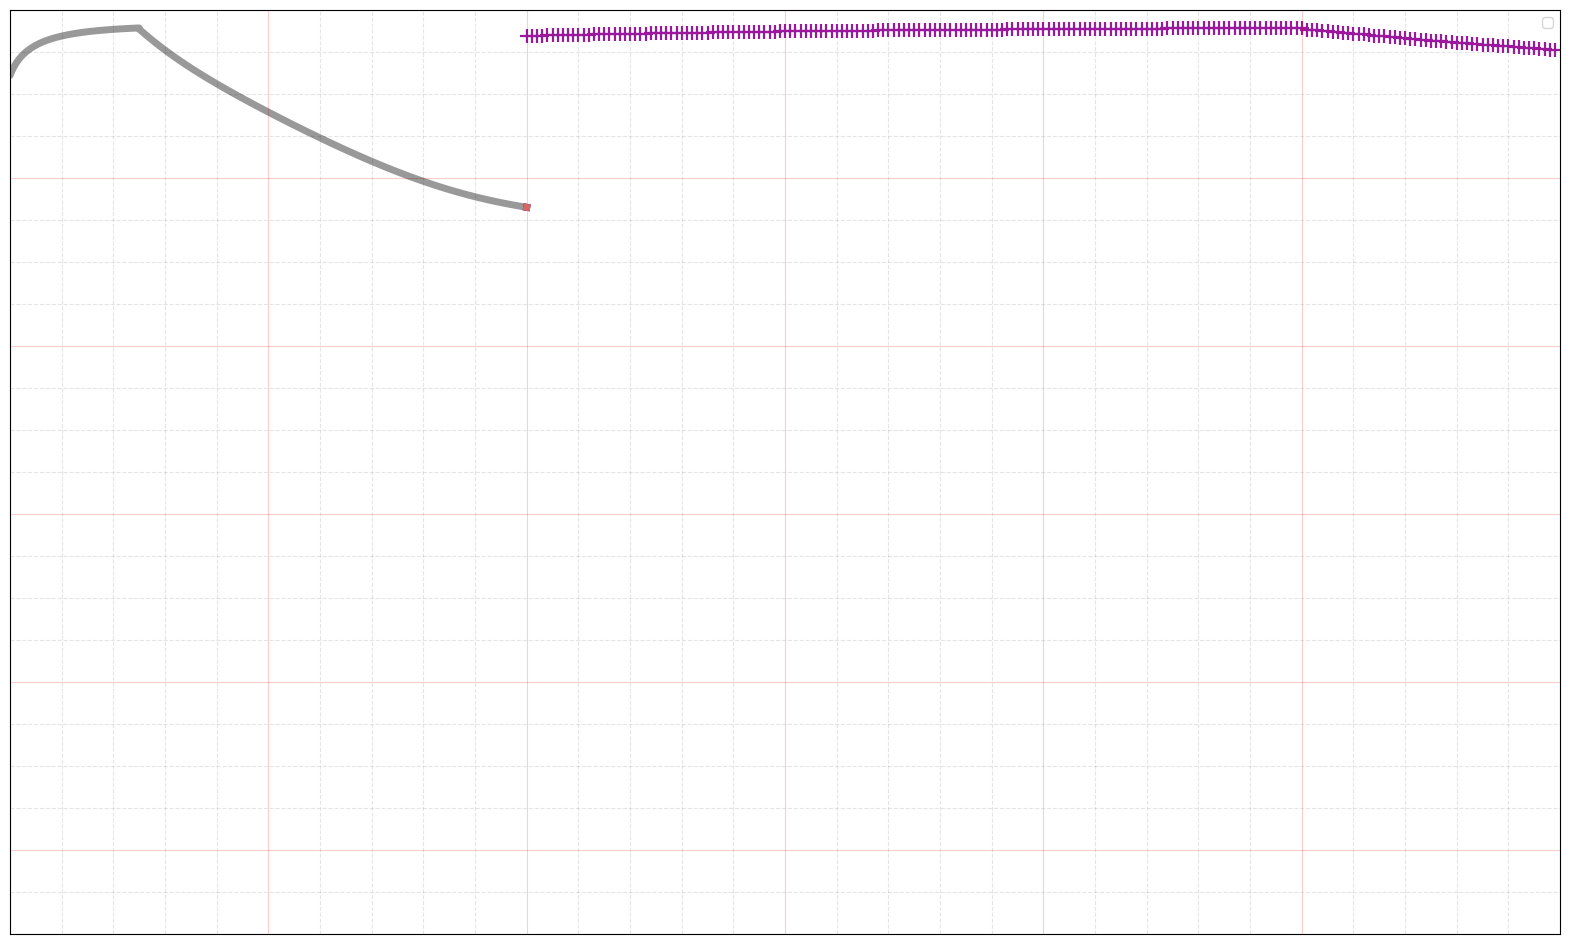

In [65]:
color_map = cm.get_cmap("plasma")

N = 30000
M = 100
switch = 10000
factor = 1

fig = plt.figure(figsize=(20, 12))

plt.plot(np.arange(len(error_1[0.0][:switch])), error_1[0.0][:switch], color='k', alpha=0.4, linewidth=5)
for i, (overlap, err) in enumerate(error_1.items()):
#     if i in [0, 1]:
    plt.plot(np.arange(switch, len(err[:N])), err[switch:N], color=color_map(i/len(error_1)), alpha=0.8, linewidth=5)
    
for i, (overlap, err) in enumerate(error_1.items()):
    if i in [0, 1]:
        plt.scatter(np.arange(switch//factor, len(error_1_[overlap][:N//factor]))[0::M], error_1_[overlap][switch//factor:N//factor][0::M], color=color_map(i/len(error_1_)), s=100, marker="+")

plt.legend()
plt.xlim(0, N)
plt.ylim(-11, 0)
plt.minorticks_on()
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
fig.savefig("long_time_transfer_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

In [67]:
color_map = cm.get_cmap("viridis")

def cross_section_plot(interval):
    forgettings = {}
    fig = plt.figure()
    for i, (overlap, err) in enumerate(error_0.items()):
        switch_error = err[switch]
        interval_error = err[interval]
        forgetting = interval_error - switch_error
        forgettings[overlap] = forgetting
        plt.scatter(overlap, forgetting, color=color_map(i/len(error_0)), s=100)
    for i, (overlap, err) in enumerate(error_0_.items()):
        switch_error = err[switch]
        interval_error = err[interval]
        forgetting = interval_error - switch_error
        forgettings[overlap] = forgetting
        plt.scatter(overlap, forgetting, color=color_map(i/len(error_0)), marker='+')
    plt.minorticks_on()
    plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
    plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
    plt.tick_params(
                axis='both',         # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False, # labels along the bottom edge are off
                left=False,
                labelleft=False
            )
    plt.xlim(0, 1)
#     plt.ylim(0, 1)
    fig.show()
    fig.savefig(f"forgetting_cross_section_{interval - switch}_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\2274862507.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")


C:\Users\USER\AppData\Local\Temp\ipykernel_14720\2274862507.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


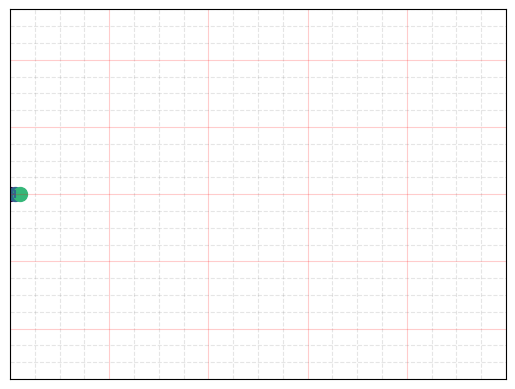

In [69]:
cross_section_plot(10000)

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\393036961.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


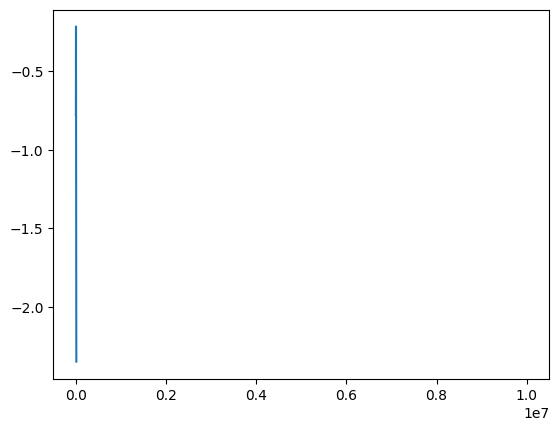

In [70]:
fig = plt.figure()
plt.plot(np.arange(len(ode_df.log_generalisation_error_1)), np.array(ode_df.log_generalisation_error_1))
plt.plot(100 * np.arange(len(network_df.log_generalisation_error_1)), np.array(network_df.log_generalisation_error_1), linestyle="dashed")
fig.show()